# Initial EDA on Raw UNGA dataset

Data set is taken from here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379

In [118]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import scale
%matplotlib inline
!pip install HDBSCAN
import hdbscan
from sklearn import metrics
from sklearn.cluster import DBSCAN

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [119]:
df_votes = pd.read_csv('~/Desktop/dataverse_files/UNVotes1-72.tab',sep='\t')

In [120]:
df_votes.member = df_votes.member.fillna(value=0)

In [121]:
df_votes_C = df_votes.drop(['Country', 'Countryname'], axis=1)

In [122]:
df_votes_1960 = df_votes_C[df_votes.year == 1985]

In [123]:
df_votes_1960_members = df_votes_1960[df_votes_1960.member == 1]

In [124]:
df_votes_1960_members

,rcid,ccode,session,member,vote,year
560268,2791.0,2,40.0,1.0,3,1985
560269,2791.0,20,40.0,1.0,1,1985
560270,2791.0,31,40.0,1.0,8,1985
560271,2791.0,40,40.0,1.0,1,1985
560272,2791.0,41,40.0,1.0,1,1985
560273,2791.0,42,40.0,1.0,1,1985
560274,2791.0,51,40.0,1.0,1,1985
560275,2791.0,52,40.0,1.0,1,1985
560276,2791.0,53,40.0,1.0,8,1985
560277,2791.0,54,40.0,1.0,8,1985


In [125]:
df_votes_1960_binary = df_votes_1960[(df_votes_1960.vote <= 1) | (df_votes_1960.vote == 3)]

In [126]:
df_votes_1960_binary.vote = df_votes_1960_binary.vote.replace(to_replace=3, value=0, inplace=False, limit=None, regex=False, method='pad', axis=None)

/Users/jakerattner/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [127]:
df_1960_features = df_votes_1960_binary.drop([ 'session', 'year'], axis=1)

In [128]:
df_1960_features['v_res'] = df_1960_features['rcid']*df_1960_features['vote']

In [129]:
df_1960_dummies = pd.concat([df_1960_features,pd.get_dummies(df_1960_features.v_res, prefix='res_')], axis = 1)

In [130]:
df_t = df_1960_dummies.groupby('ccode').sum()

In [131]:
df_t = df_t.drop(['v_res', 'res__0.0', 'vote','member','rcid'], axis=1)

In [132]:
features = list(df_t)

# HDBSCAN

In [133]:
hdbscn = hdbscan.HDBSCAN(min_cluster_size = 10,
               gen_min_span_tree = True)

In [134]:
hdbscn.fit(df_t[features])

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=10, min_samples=None, p=None,
    prediction_data=False)

In [135]:
hdbscn_labels = hdbscn.labels_

In [136]:
hdbscn_labels 

array([ 0,  0,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        0,  1, -1,  1,  1])

In [137]:
hdbscn_n_clusters_ = len(set(hdbscn_labels)) - (1 if -1 in hdbscn_labels else 0)

In [138]:
print('Estimated number of clusters: %d' % hdbscn_n_clusters_)
# print('Homogeneity: %0.6f' % metrics.homogeneity_score(y, hdbscn_labels))
# print('Completeness: %0.6f' % metrics.completeness_score(y, hdbscn_labels))
print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(df_t[features], hdbscn_labels))

Estimated number of clusters: 2
Silhouette Coefficient: 0.363391


I can assume from all the tests I've run that this is the best mode: HDBSCAN.  This is because it both auto selects number of clusters and it performs much better than DBScan

In [139]:
df_votes.head()

,rcid,ccode,session,member,vote,Country,Countryname,year
0,3.0,2,1.0,1.0,1,USA,United States of America,1946
1,3.0,20,1.0,1.0,3,CAN,Canada,1946
2,3.0,31,1.0,0.0,9,BHS,Bahamas,1946
3,3.0,40,1.0,1.0,1,CUB,Cuba,1946
4,3.0,41,1.0,1.0,1,HTI,Haiti,1946


In [140]:
df_t['cluster'] = hdbscn_labels 

In [141]:
df_t.reset_index(inplace=True)
df_t.head(2)

,ccode,res__2791.0,res__2792.0,res__2793.0,res__2794.0,res__2795.0,res__2796.0,res__2797.0,res__2798.0,res__2799.0,...,res__2937.0,res__2938.0,res__2939.0,res__2940.0,res__2941.0,res__2942.0,res__2943.0,res__2944.0,res__2945.0,cluster
0,2,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,20,1,0,1,0,1,1,1,1,0,...,1,1,1,1,1,1,0,0,0,0


In [142]:
df_votes[['ccode','Countryname']].head(2)

,ccode,Countryname
0,2,United States of America
1,20,Canada


In [143]:
df_name_index = pd.DataFrame(df_votes.groupby(['ccode', 'Countryname'])['Countryname'].count())

In [144]:
df_name_index['count'] = df_name_index.Countryname
df_name_index = df_name_index.drop([ 'Countryname'], axis=1)
df_name_index.head(2)

,,count
ccode,Countryname,
2,United States of America,5598
20,Canada,5598


In [145]:
df_name_index.reset_index(inplace=True)

In [146]:
#df_t.join(df_name_index, how='left', on='ccode')
df_votes_1960 = pd.merge(df_t, df_name_index, on='ccode')
df_votes_1960.head()

,ccode,res__2791.0,res__2792.0,res__2793.0,res__2794.0,res__2795.0,res__2796.0,res__2797.0,res__2798.0,res__2799.0,...,res__2939.0,res__2940.0,res__2941.0,res__2942.0,res__2943.0,res__2944.0,res__2945.0,cluster,Countryname,count
0,2,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,United States of America,5598
1,20,1,0,1,0,1,1,1,1,0,...,1,1,1,1,0,0,0,0,Canada,5598
2,31,0,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,Bahamas,5598
3,40,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,Cuba,5598
4,41,1,0,1,1,1,0,0,1,0,...,1,1,1,1,1,1,1,1,Haiti,5598


In [147]:
#let's see which countres are in the two clusters

In [148]:
df_votes_1960[df_votes_1960.cluster == 1]['Countryname']

2                                Bahamas
3                                   Cuba
4                                  Haiti
5                     Dominican Republic
6                                Jamaica
7                    Trinidad and Tobago
8                               Barbados
11                           Saint Lucia
12      Saint Vincent and the Grenadines
13                   Antigua and Barbuda
15                                Mexico
17                             Guatemala
18                              Honduras
19                           El Salvador
20                             Nicaragua
22                                Panama
23                              Colombia
24     Venezuela, Bolivarian Republic of
25                                Guyana
26                              Suriname
27                               Ecuador
28                                  Peru
29                                Brazil
30      Bolivia (Plurinational State of)
32              

# PCA

In [149]:
from sklearn.decomposition import PCA

In [150]:
df_PCA_1960 = df_votes_1960.drop(['count', 'Countryname'], axis=1)

In [151]:
df_PCA_1960.head(2)

,ccode,res__2791.0,res__2792.0,res__2793.0,res__2794.0,res__2795.0,res__2796.0,res__2797.0,res__2798.0,res__2799.0,...,res__2937.0,res__2938.0,res__2939.0,res__2940.0,res__2941.0,res__2942.0,res__2943.0,res__2944.0,res__2945.0,cluster
0,2,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,20,1,0,1,0,1,1,1,1,0,...,1,1,1,1,1,1,0,0,0,0


In [152]:
#df_votes_1960.set_index('ccode')
df_PCA_1960.head(2)

,ccode,res__2791.0,res__2792.0,res__2793.0,res__2794.0,res__2795.0,res__2796.0,res__2797.0,res__2798.0,res__2799.0,...,res__2937.0,res__2938.0,res__2939.0,res__2940.0,res__2941.0,res__2942.0,res__2943.0,res__2944.0,res__2945.0,cluster
0,2,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,20,1,0,1,0,1,1,1,1,0,...,1,1,1,1,1,1,0,0,0,0


In [153]:
X = df_PCA_1960

pca = PCA()
pca = pca.fit(X)
X

,ccode,res__2791.0,res__2792.0,res__2793.0,res__2794.0,res__2795.0,res__2796.0,res__2797.0,res__2798.0,res__2799.0,...,res__2937.0,res__2938.0,res__2939.0,res__2940.0,res__2941.0,res__2942.0,res__2943.0,res__2944.0,res__2945.0,cluster
0,2,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,20,1,0,1,0,1,1,1,1,0,...,1,1,1,1,1,1,0,0,0,0
2,31,0,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3,40,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,41,1,0,1,1,1,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
5,42,1,0,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,51,1,0,1,1,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
7,52,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,53,0,0,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
9,54,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [154]:
Z = pca.transform(X)
features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
Z = pd.DataFrame(Z, columns=features_pca)
Z.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157
0,-445.081102,6.663639,1.078572,2.241676,1.134260,-0.227166,-0.868552,-1.667972,-0.041022,-0.362178,...,0.000751,-0.000254,0.000133,-0.000009,-0.000032,2.527159e-06,-6.151579e-16,3.395556e-16,5.687513e-16,-1.336658e-16
1,-427.074022,5.229043,-0.563489,-1.740935,0.019877,0.193206,-0.771150,0.252273,-0.154066,-0.181469,...,0.000150,-0.000115,0.000070,-0.000048,-0.000058,1.952214e-06,-4.208688e-16,-4.902241e-17,2.911955e-16,-3.557104e-16
2,-416.054908,-1.474664,-1.288641,0.513439,0.478618,-0.432753,1.226117,1.346637,-0.241964,-0.168685,...,0.001041,0.000327,0.000085,-0.000164,0.000055,-2.543271e-06,4.352172e-16,-1.461669e-16,-2.396367e-16,1.282774e-16
3,-407.047912,-3.565367,2.560102,-0.486467,-0.238329,0.844677,0.398767,0.956146,-0.102070,-0.648439,...,-0.002671,0.000899,0.001278,-0.001153,0.000780,-2.698411e-05,-2.447944e-16,-4.902241e-17,1.211858e-16,-1.050044e-17
4,-406.057822,-1.023248,-0.768337,2.404193,-1.462342,-0.188293,0.401966,1.557695,-0.109874,1.064202,...,0.000339,0.000129,-0.000098,0.000149,0.000005,3.262086e-08,2.686837e-16,-2.016781e-16,-2.951478e-16,2.115442e-16


In [155]:
print(pca.explained_variance_)

[  6.75074065e+04   8.63895437e+00   2.56456675e+00   1.37507700e+00
   9.42935538e-01   8.55726866e-01   6.01540855e-01   5.02176340e-01
   4.54110389e-01   4.36941650e-01   3.70023531e-01   3.33580930e-01
   3.15108756e-01   3.00474734e-01   2.78115311e-01   2.45388392e-01
   2.34023804e-01   2.20386857e-01   2.09585686e-01   2.00238509e-01
   1.92572607e-01   1.86910146e-01   1.77297113e-01   1.68694443e-01
   1.55690818e-01   1.51242538e-01   1.42296824e-01   1.40770290e-01
   1.32960214e-01   1.26342958e-01   1.24757503e-01   1.17302372e-01
   1.12822286e-01   1.07208059e-01   1.01095206e-01   9.82063653e-02
   9.53992879e-02   9.22019280e-02   8.84161280e-02   8.55300496e-02
   8.48715842e-02   7.77214093e-02   7.55214961e-02   7.31432420e-02
   7.19164231e-02   7.08644405e-02   6.78150892e-02   6.38205160e-02
   6.30853810e-02   6.21852519e-02   6.02549347e-02   5.79769057e-02
   5.26249917e-02   5.18731328e-02   5.01975332e-02   4.91226971e-02
   4.73046587e-02   4.52697744e-02

In [156]:
abs((pca.components_))[0]

array([  9.99993096e-01,   1.82247184e-04,   7.43345147e-04,
         1.54424952e-04,   1.59732037e-05,   1.45880829e-04,
         2.33122276e-05,   3.21775778e-04,   3.21909303e-04,
         3.07748231e-04,   5.22687831e-04,   4.41915312e-04,
         4.10485992e-04,   4.24888037e-04,   2.59338193e-04,
         4.95095144e-04,   3.37524629e-04,   3.94808733e-04,
         4.18285801e-04,   4.10354258e-04,   1.24400443e-04,
         3.85566387e-05,   3.18512188e-04,   2.26175326e-04,
         1.79415595e-04,   4.16863269e-04,   4.48034521e-04,
         1.73287018e-04,   6.97230038e-04,   3.65829562e-04,
         2.34964367e-04,   1.90938259e-04,   2.05245348e-04,
         2.70896711e-04,   2.38965021e-04,   1.56920290e-04,
         1.14109229e-04,   1.58756886e-04,   2.73861496e-04,
         5.15230194e-05,   3.65777545e-04,   1.90780651e-04,
         1.96769903e-04,   3.15951137e-04,   1.85942742e-04,
         2.57079588e-04,   2.81842632e-04,   2.34331338e-04,
         5.61593076e-04,

In [157]:

print(abs((pca.components_))[0], '\n')
#print('-------------------------------------\n')



[  9.99993096e-01   1.82247184e-04   7.43345147e-04   1.54424952e-04
   1.59732037e-05   1.45880829e-04   2.33122276e-05   3.21775778e-04
   3.21909303e-04   3.07748231e-04   5.22687831e-04   4.41915312e-04
   4.10485992e-04   4.24888037e-04   2.59338193e-04   4.95095144e-04
   3.37524629e-04   3.94808733e-04   4.18285801e-04   4.10354258e-04
   1.24400443e-04   3.85566387e-05   3.18512188e-04   2.26175326e-04
   1.79415595e-04   4.16863269e-04   4.48034521e-04   1.73287018e-04
   6.97230038e-04   3.65829562e-04   2.34964367e-04   1.90938259e-04
   2.05245348e-04   2.70896711e-04   2.38965021e-04   1.56920290e-04
   1.14109229e-04   1.58756886e-04   2.73861496e-04   5.15230194e-05
   3.65777545e-04   1.90780651e-04   1.96769903e-04   3.15951137e-04
   1.85942742e-04   2.57079588e-04   2.81842632e-04   2.34331338e-04
   5.61593076e-04   1.28275270e-04   6.74024610e-04   3.39513042e-04
   2.21612695e-04   2.43698287e-04   2.24044897e-04   1.20612104e-04
   1.81466023e-04   9.89319762e-05

In [158]:
X.reset_index(inplace=True)
X.head()

,index,ccode,res__2791.0,res__2792.0,res__2793.0,res__2794.0,res__2795.0,res__2796.0,res__2797.0,res__2798.0,...,res__2937.0,res__2938.0,res__2939.0,res__2940.0,res__2941.0,res__2942.0,res__2943.0,res__2944.0,res__2945.0,cluster
0,0,2,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,20,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
2,2,31,0,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3,3,40,1,1,0,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,4,41,1,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1


In [159]:
df_PCA_1960 = df_PCA_1960.drop(['res__627.0', 'res__628.0', 'res__629.0', 'res__630.0', 'res__631.0', 
                            'res__632.0', 'res__633.0', 'res__634.0', 'res__635.0', 'res__636.0', 
                            'res__637.0', 'res__638.0', 'res__639.0', 'res__640.0', 'res__641.0', 
                            'res__642.0', 'res__643.0', 'res__644.0', 'res__645.0', 'res__646.0', 
                            'res__647.0', 'res__648.0', 'res__649.0', 'res__650.0', 'res__651.0', 
                            'res__652.0', 'res__653.0', 'res__654.0', 'res__655.0', 'res__656.0', 
                            'res__657.0', 'res__658.0', 'res__659.0', 'res__660.0', 'res__661.0', 
                            'res__662.0', 'res__663.0', 'res__664.0', 'res__665.0', 'res__666.0', 
                            'res__667.0', 'res__668.0', 'res__669.0', 'res__670.0', 'res__671.0', 
                            'res__672.0', 'res__673.0', 'res__674.0', 'res__675.0', 'res__676.0', 
                            'res__677.0', 'res__678.0', 'res__9040.0', 'res__9041.0'], axis=1)


ValueError: labels ['res__627.0' 'res__628.0' 'res__629.0' 'res__630.0' 'res__631.0'
 'res__632.0' 'res__633.0' 'res__634.0' 'res__635.0' 'res__636.0'
 'res__637.0' 'res__638.0' 'res__639.0' 'res__640.0' 'res__641.0'
 'res__642.0' 'res__643.0' 'res__644.0' 'res__645.0' 'res__646.0'
 'res__647.0' 'res__648.0' 'res__649.0' 'res__650.0' 'res__651.0'
 'res__652.0' 'res__653.0' 'res__654.0' 'res__655.0' 'res__656.0'
 'res__657.0' 'res__658.0' 'res__659.0' 'res__660.0' 'res__661.0'
 'res__662.0' 'res__663.0' 'res__664.0' 'res__665.0' 'res__666.0'
 'res__667.0' 'res__668.0' 'res__669.0' 'res__670.0' 'res__671.0'
 'res__672.0' 'res__673.0' 'res__674.0' 'res__675.0' 'res__676.0'
 'res__677.0' 'res__678.0' 'res__9040.0' 'res__9041.0'] not contained in axis

In [160]:
#pd.concat([X,Z])
X = X.join(Z, lsuffix='_caller', rsuffix='_other')
X

,index,ccode,res__2791.0,res__2792.0,res__2793.0,res__2794.0,res__2795.0,res__2796.0,res__2797.0,res__2798.0,...,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157
0,0,2,0,0,1,0,1,0,0,1,...,0.000751,-0.000254,0.000133,-0.000009,-0.000032,2.527159e-06,-6.151579e-16,3.395556e-16,5.687513e-16,-1.336658e-16
1,1,20,1,0,1,0,1,1,1,1,...,0.000150,-0.000115,0.000070,-0.000048,-0.000058,1.952214e-06,-4.208688e-16,-4.902241e-17,2.911955e-16,-3.557104e-16
2,2,31,0,0,1,1,1,1,1,0,...,0.001041,0.000327,0.000085,-0.000164,0.000055,-2.543271e-06,4.352172e-16,-1.461669e-16,-2.396367e-16,1.282774e-16
3,3,40,1,1,0,1,0,1,1,1,...,-0.002671,0.000899,0.001278,-0.001153,0.000780,-2.698411e-05,-2.447944e-16,-4.902241e-17,1.211858e-16,-1.050044e-17
4,4,41,1,0,1,1,1,0,0,1,...,0.000339,0.000129,-0.000098,0.000149,0.000005,3.262086e-08,2.686837e-16,-2.016781e-16,-2.951478e-16,2.115442e-16
5,5,42,1,0,1,1,1,0,1,1,...,0.000298,-0.000028,0.000090,-0.000121,-0.000029,2.250501e-06,-2.170388e-16,2.036652e-17,3.709860e-16,-1.215227e-16
6,6,51,1,0,1,1,1,0,1,0,...,0.000317,0.000040,-0.000268,0.000152,-0.000005,-3.402634e-06,-2.586722e-16,2.840445e-16,2.599637e-16,1.725513e-17
7,7,52,1,1,1,1,1,1,1,1,...,0.001984,-0.001729,-0.000367,-0.001328,-0.000732,5.749012e-05,-9.213874e-17,1.869000e-16,3.709860e-16,7.276628e-17
8,8,53,0,0,1,1,1,0,0,1,...,-0.000786,-0.000189,0.000119,-0.000225,-0.000046,7.377864e-07,1.021503e-16,2.424111e-16,2.877193e-16,-1.050044e-17
9,9,54,0,0,1,0,1,0,0,0,...,0.000848,0.000422,-0.000014,0.000125,0.000045,-1.479951e-06,-3.055606e-17,-9.065578e-17,7.259323e-17,-3.478657e-17


In [161]:
df_PCA_1960 = pd.merge(X, df_PCA_1960, on='ccode')

In [113]:
df_PCA_1960 = df_PCA_1960.drop(['res__627.0', 'res__628.0', 'res__629.0', 'res__630.0', 'res__631.0', 
                            'res__632.0', 'res__633.0', 'res__634.0', 'res__635.0', 'res__636.0', 
                            'res__637.0', 'res__638.0', 'res__639.0', 'res__640.0', 'res__641.0', 
                            'res__642.0', 'res__643.0', 'res__644.0', 'res__645.0', 'res__646.0', 
                            'res__647.0', 'res__648.0', 'res__649.0', 'res__650.0', 'res__651.0', 
                            'res__652.0', 'res__653.0', 'res__654.0', 'res__655.0', 'res__656.0', 
                            'res__657.0', 'res__658.0', 'res__659.0', 'res__660.0', 'res__661.0', 
                            'res__662.0', 'res__663.0', 'res__664.0', 'res__665.0', 'res__666.0', 
                            'res__667.0', 'res__668.0', 'res__669.0', 'res__670.0', 'res__671.0', 
                            'res__672.0', 'res__673.0', 'res__674.0', 'res__675.0', 'res__676.0', 
                            'res__677.0', 'res__678.0', 'res__9040.0', 'res__9041.0'], axis=1)


ValueError: labels ['res__627.0' 'res__628.0' 'res__629.0' 'res__630.0' 'res__631.0'
 'res__632.0' 'res__633.0' 'res__634.0' 'res__635.0' 'res__636.0'
 'res__637.0' 'res__638.0' 'res__639.0' 'res__640.0' 'res__641.0'
 'res__642.0' 'res__643.0' 'res__644.0' 'res__645.0' 'res__646.0'
 'res__647.0' 'res__648.0' 'res__649.0' 'res__650.0' 'res__651.0'
 'res__652.0' 'res__653.0' 'res__654.0' 'res__655.0' 'res__656.0'
 'res__657.0' 'res__658.0' 'res__659.0' 'res__660.0' 'res__661.0'
 'res__662.0' 'res__663.0' 'res__664.0' 'res__665.0' 'res__666.0'
 'res__667.0' 'res__668.0' 'res__669.0' 'res__670.0' 'res__671.0'
 'res__672.0' 'res__673.0' 'res__674.0' 'res__675.0' 'res__676.0'
 'res__677.0' 'res__678.0' 'res__9040.0' 'res__9041.0'] not contained in axis

In [114]:
df_PCA_1960 = df_PCA_1960.drop(['index_x','PC3', 'PC4', 'PC5',
       'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14',
       'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23',
       'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32',
       'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41',
       'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50',
       'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'index_y', 'cluster_y'], axis=1)

In [115]:
df_PCA_1960.head(2)

,level_0_x,ccode,res__2791.0_x,res__2792.0_x,res__2793.0_x,res__2794.0_x,res__2795.0_x,res__2796.0_x,res__2797.0_x,res__2798.0_x,...,res__2936.0_y,res__2937.0_y,res__2938.0_y,res__2939.0_y,res__2940.0_y,res__2941.0_y,res__2942.0_y,res__2943.0_y,res__2944.0_y,res__2945.0_y
0,0,2,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,20,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


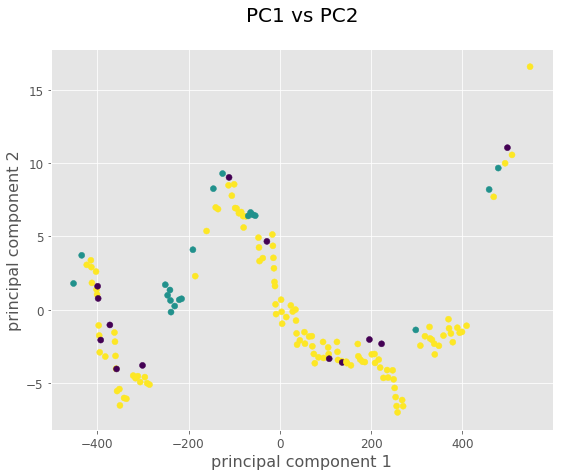

In [116]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax.scatter(Z.iloc[:,0], Z.iloc[:,1],
                   c=df_PCA_1960.cluster_x)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

In [117]:
df_PCA_1960.head(2)

,level_0_x,ccode,res__2791.0_x,res__2792.0_x,res__2793.0_x,res__2794.0_x,res__2795.0_x,res__2796.0_x,res__2797.0_x,res__2798.0_x,...,res__2936.0_y,res__2937.0_y,res__2938.0_y,res__2939.0_y,res__2940.0_y,res__2941.0_y,res__2942.0_y,res__2943.0_y,res__2944.0_y,res__2945.0_y
0,0,2,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,20,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


# Junk and other imports

In [ ]:
# users[users.age == 20]
#
# Select one column from the filtered results.
# users[users.age < 20].occupation
# users[users.age < 20].occupation.value_counts()
# users[(users.age < 20) & (users.gender=='M')]
# users[users.occupation.isin(['doctor', 'lawyer'])]

In [ ]:
df_points = pd.read_csv('~/Desktop/dataverse_files/IdealpointsPublished.tab',sep='\t')
# df points is Ideal point data. Unit of analysis is the country-session 
# (which corresponds closely but not perfectly, to country-year). This 
# contains country-specific ideal point estimates. 

In [ ]:
df_points.columns

In [ ]:
df_dyadic = pd.read_csv('~/Desktop/dataverse_files/Dyadicdata.tab',sep='\t')

In [ ]:
df_dyadic.columns
# Dyadid affinity and ideal point data. Unit of analysis is the dyad-session (year). 
# This file contains distances between country ideal points as well as Affinity scores 
# (although we recommend against using these). 

In [ ]:
df_descriptions = pd.read_csv('~/documents/UN-Capstone/Dscription.csv')

In [ ]:
df_descriptions.tail(30)

In [ ]:
df_descriptions.head()

In [ ]:
df_UNAid = pd.read_csv('~/documents/UN-Capstone/net_aid.csv')

In [ ]:
df_UNAid